For one Ei, calculate resolution functions at a bunch of energy transfers

In [1]:
%cd ~/dv/srins/graphite-DOS/notebooks/

/home/lj7/dv/srins/graphite-DOS/notebooks


In [2]:
import numpy as np, os
from matplotlib import pyplot as plt
%matplotlib inline
import histogram.hdf as hh, histogram as H

In [3]:
from dgsres.powder import use_ConstantQEKernel

## Explanation of parameters
* Q=7. If choose center of the dynamic range, Q should be around 8. But the coverage of ARCS det system is not very good near that. That is why we use Q=7. See the IQE plot below
* ncount=1e7 and nodes=20 takes about 10min per energy
* dE probably should be around 0.5% of the Ei

plot z in (-1.9030340405e-05, 0.000259236141028)


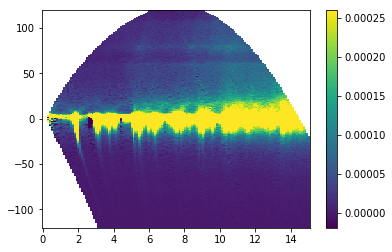

In [5]:
iqe = hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-130meV/iqe-interped.h5')
H.plot(iqe[(0, 15), ()])

In [7]:
sim = use_ConstantQEKernel.Sim(
    workdir = "/SNS/users/lj7/simulations/ARCS/graphite/resolution/Ei_130",
    beamdir = "/SNS/users/lj7/simulations/ARCS/beam/130meV-n3e9-FC_600-T0_90/",
    Ei = 130,
    Q = 7.,
    dQ_axis = (-1, 1, 0.02),
    dE_axis = (-30, 20, 0.2),
    ncount = 1e7,
    nodes = 20
)

## Test one E

In [8]:
sim.run(E=100.)

In [9]:
ls {sim.workdir}/out

ie-Q_7.0-E_100.0.h5  iqe-Q_7.0-E_100.0.h5


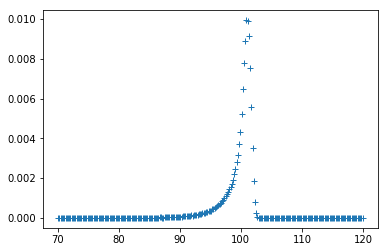

In [14]:
hist = hh.load(os.path.join(sim.outdir, 'ie-Q_7.0-E_100.0.h5'))
plt.plot(hist.E, hist.I, '+')

## Run all Es

In [15]:
%%time
for E in np.arange(0., 130.-1, 10.):
    if os.path.exists(os.path.join(sim.outdir, 'iqe-Q_7.0-E_%s.h5' % E)): continue
    print E
    sim.run(E)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
110.0
120.0
CPU times: user 1.01 s, sys: 260 ms, total: 1.27 s
Wall time: 1h 38min 36s


In [17]:
ls {sim.outdir}

ie-Q_7.0-E_0.0.h5    ie-Q_7.0-E_60.0.h5    iqe-Q_7.0-E_20.0.h5
ie-Q_7.0-E_100.0.h5  ie-Q_7.0-E_70.0.h5    iqe-Q_7.0-E_30.0.h5
ie-Q_7.0-E_10.0.h5   ie-Q_7.0-E_80.0.h5    iqe-Q_7.0-E_40.0.h5
ie-Q_7.0-E_110.0.h5  ie-Q_7.0-E_90.0.h5    iqe-Q_7.0-E_50.0.h5
ie-Q_7.0-E_120.0.h5  iqe-Q_7.0-E_0.0.h5    iqe-Q_7.0-E_60.0.h5
ie-Q_7.0-E_20.0.h5   iqe-Q_7.0-E_100.0.h5  iqe-Q_7.0-E_70.0.h5
ie-Q_7.0-E_30.0.h5   iqe-Q_7.0-E_10.0.h5   iqe-Q_7.0-E_80.0.h5
ie-Q_7.0-E_40.0.h5   iqe-Q_7.0-E_110.0.h5  iqe-Q_7.0-E_90.0.h5
ie-Q_7.0-E_50.0.h5   iqe-Q_7.0-E_120.0.h5


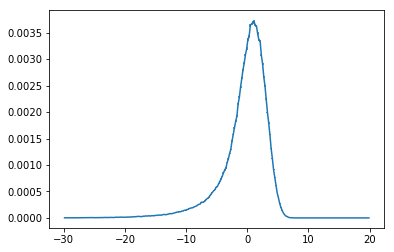

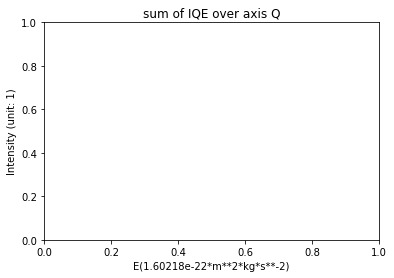

In [18]:
H.plot(hh.load(os.path.join(sim.outdir, 'ie-Q_7.0-E_0.0.h5')))

## Code for Debugging

In [ ]:
%cd {sim.simdir}

In [ ]:
!time mcvine instruments arcs nxs reduce sim.nxs --qaxis 11 13 0.1 --eaxis 210 290 2 --tof2E

In [ ]:
H.plot(hh.load(os.path.join(sim.simdir, 'iqe.h5')), min=0)

In [ ]:
iqe.I[iqe.I!=iqe.I] = 0

In [ ]:
ie = iqe.sum('Q')

In [ ]:
plt.plot(ie.E, ie.I)
plt.show()